> # **Instal Tesseract OCR**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python google-generativeai googletrans==4.0.0-rc1 gTTS

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (7,982 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

> # **Import Library**

In [10]:
import io
import os
import time
import shutil
from base64 import b64decode
from IPython.display import display, Image as IPImage, Javascript, Audio
from google.colab import drive, files
from google.colab.output import eval_js
from googletrans import Translator
import cv2
import google.generativeai as palm
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from pytesseract import Output, pytesseract
from gtts import gTTS

> # **Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_folder = '/content/drive/MyDrive/Bard'
path_api = path_folder  + '/API/api_key.txt'

> # **Mendeteksi Karakter pada Gambar**

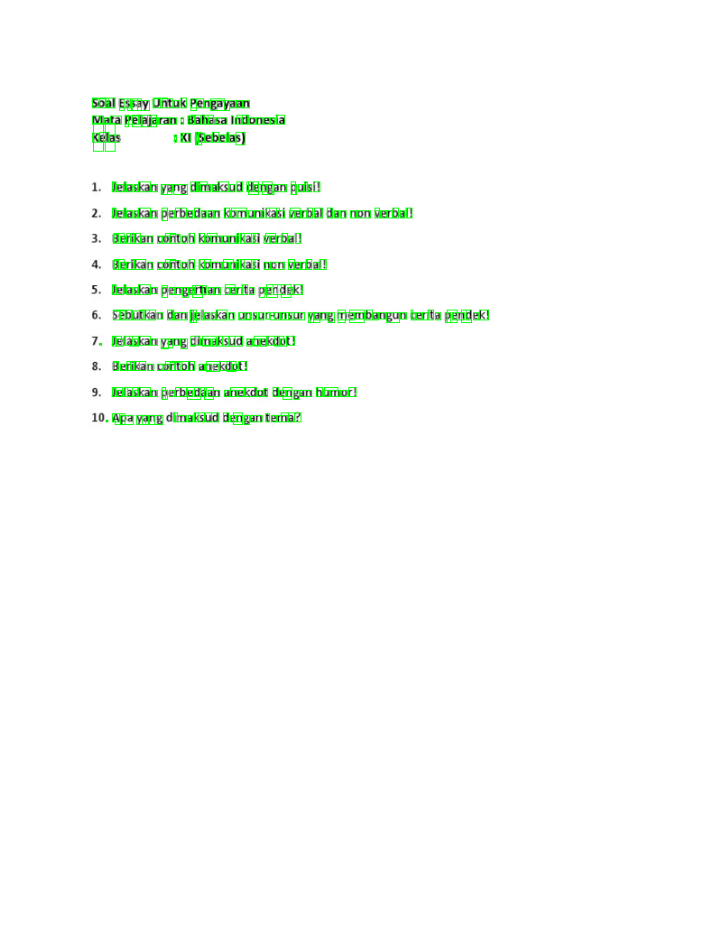

In [7]:
image = cv2.imread(path_folder + '/image/essai1.jpg')

h, w, c = image.shape

boxes = pytesseract.image_to_boxes(image)

for b in boxes.splitlines():
    b = b.split(' ')
    karakter_image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

b, g, r = cv2.split(karakter_image)
karakter_img = cv2.merge([r, g, b])

plt.figure(figsize=(16, 12))
plt.imshow(karakter_img)
plt.axis('off')
plt.show()

> # **Mendeteksi Kata pada Gambar**

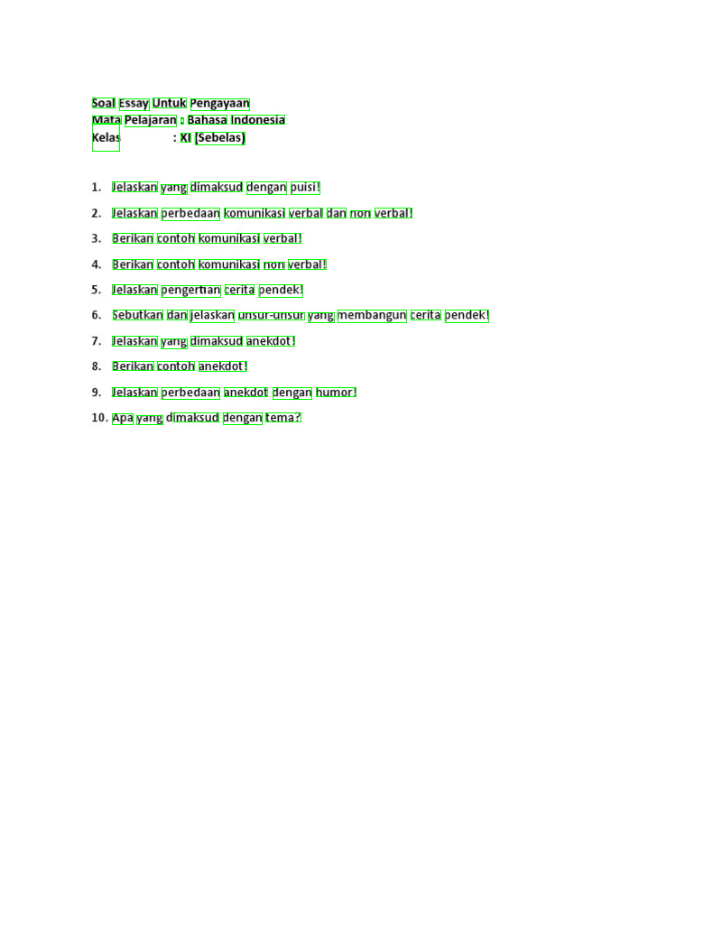

In [8]:
image = cv2.imread(path_folder + '/image/essai1.jpg')

d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        kata_image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

b, g, r = cv2.split(kata_image)
kata_img = cv2.merge([r, g, b])

plt.figure(figsize=(16, 12))
plt.imshow(kata_img)
plt.axis('off')
plt.show()

> # **OCR dengan PyTesseract**

In [9]:
image = cv2.imread(path_folder + '/image/essai1.jpg')

custom_config = r'-l eng --oem 3 --psm 6'

prompt = pytesseract.image_to_string(image, config=custom_config)

print("Hasil OCR\t:")
print(prompt)

Hasil OCR	:
Soal Essay Untuk Pengayaan

Mata Pelajaran : Bahasa Indonesia

Kelas 2X1 (Sebelas)

1. Jelaskan yang dimaksud dengan puisi!

2. Jelaskan perbedaan komunikasi verbal dan non verbal!
3. Berikan contoh komunikasi verbal!

4. Berikan contoh komunikasi non verbal!

5. Jelaskan pengertian cerita pendek!

6. Sebutkan dan jelaskan unsur-unsur yang membangun cerita pendek!
7. Jelaskan yang dimaksud anekdot!

8. Berikan contoh anekdot!

9. Jelaskan perbedaan anekdot dengan humor!

10. Apa yang dimaksud dengan tema?



> # **Menggunakan Palm untuk Generate Text Berdasarkan Hasil OCR**

In [12]:
with open(path_api, 'r') as file:
    api_key = file.read().strip()

palm.configure(api_key=api_key)

models = [m for m in palm.list_models() if 'generateText' in m.supported_generation_methods]
model = models[0].name

translator = Translator()
translated_text = translator.translate(prompt, src='id', dest='en').text

completion = palm.generate_text(
    model=model,
    prompt=translated_text,
    temperature=0,
    max_output_tokens=None,
)

translated_result = translator.translate(completion.result, src='en', dest='id').text.replace("*", "")

print("Soal\t:")
print(prompt)
print("\nJawab\t:")
print(translated_result)

def text_to_speech(text, language='id', slow=False):
    tts = gTTS(text=text, lang=language, slow=False)

    tts.save(path_folder + "answer.mp3")

    return Audio(path_folder + "answer.mp3", autoplay=True)

soal = "Soal " + prompt
text = "Jawab " + translated_result
text_to_speech(soal + text)

Soal	:
Soal Essay Untuk Pengayaan

Mata Pelajaran : Bahasa Indonesia

Kelas 2X1 (Sebelas)

1. Jelaskan yang dimaksud dengan puisi!

2. Jelaskan perbedaan komunikasi verbal dan non verbal!
3. Berikan contoh komunikasi verbal!

4. Berikan contoh komunikasi non verbal!

5. Jelaskan pengertian cerita pendek!

6. Sebutkan dan jelaskan unsur-unsur yang membangun cerita pendek!
7. Jelaskan yang dimaksud anekdot!

8. Berikan contoh anekdot!

9. Jelaskan perbedaan anekdot dengan humor!

10. Apa yang dimaksud dengan tema?


Jawab	:
1.  Puisi  adalah bentuk seni yang menggunakan kata -kata untuk menciptakan pengalaman sensorik bagi pembaca.Ini dapat digunakan untuk mengekspresikan emosi, menceritakan kisah, atau hanya melukis gambar dengan kata -kata.Puisi dapat dibaca dengan keras atau diam -diam, dan dapat dinikmati oleh orang -orang dari segala usia.

2.  Komunikasi verbal  adalah penggunaan kata -kata untuk berkomunikasi dengan seseorang.Ini dapat dilakukan secara langsung, melalui telepon, 